In [3]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, auc
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectPercentile
%matplotlib inline

In [4]:
# reading the csv file
df = pd.read_csv('fetal_health.csv')
# previewing the DataFrame
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,2.000
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,1.000
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,1.000
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,1.000
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,1.000


In [5]:
# getting info for DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
print(df.shape)
df.describe()

(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,...,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000
mean,133.304,0.003,0.009,0.004,0.002,0.000,0.000,46.990,1.333,9.847,...,93.579,164.025,4.068,0.324,137.452,134.611,138.090,18.808,0.320,1.304
std,9.841,0.004,0.047,0.003,0.003,0.000,0.001,17.193,0.883,18.397,...,29.560,17.944,2.949,0.706,16.381,15.594,14.467,28.978,0.611,0.614
min,106.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,0.200,0.000,...,50.000,122.000,0.000,0.000,60.000,73.000,77.000,0.000,-1.000,1.000
25%,126.000,0.000,0.000,0.002,0.000,0.000,0.000,32.000,0.700,0.000,...,67.000,152.000,2.000,0.000,129.000,125.000,129.000,2.000,0.000,1.000
50%,133.000,0.002,0.000,0.004,0.000,0.000,0.000,49.000,1.200,0.000,...,93.000,162.000,3.000,0.000,139.000,136.000,139.000,7.000,0.000,1.000
75%,140.000,0.006,0.003,0.007,0.003,0.000,0.000,61.000,1.700,11.000,...,120.000,174.000,6.000,0.000,148.000,145.000,148.000,24.000,1.000,1.000
max,160.000,0.019,0.481,0.015,0.015,0.001,0.005,87.000,7.000,91.000,...,159.000,238.000,18.000,10.000,187.000,182.000,186.000,269.000,1.000,3.000


In [7]:
# renaming baseline value column to make it easier to work with
df = df.rename(columns = {'baseline value':'baseline_value', 'prolongued_decelerations': 'prolonged_decelerations'})
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
# getting value counts for fetal accelerations column
df.accelerations.value_counts()

accelerations
0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: count, dtype: int64

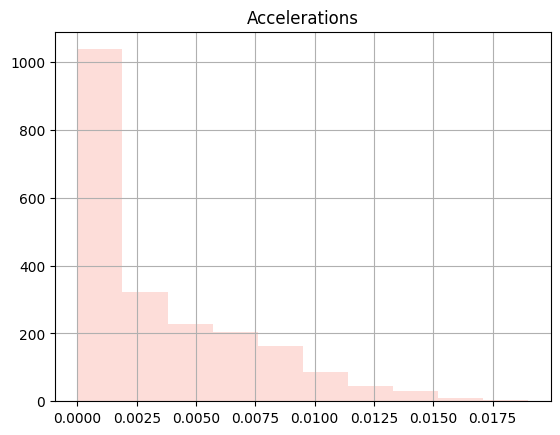

In [9]:
# plotting acceleration frequencies
sns.set_palette(palette='RdPu')
df.accelerations.hist()
plt.title('Accelerations');

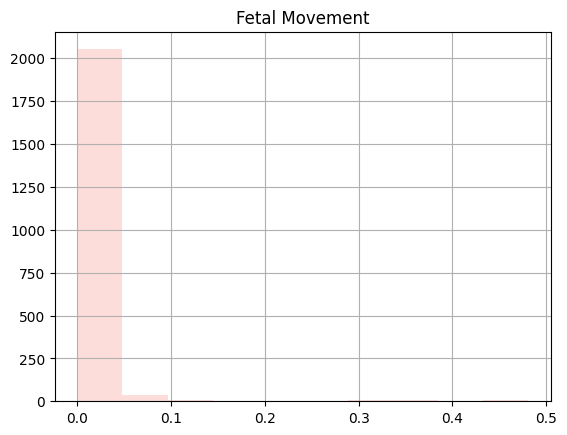

In [10]:
# plotting fetal movement frequencies
df.fetal_movement.hist()
plt.title('Fetal Movement');

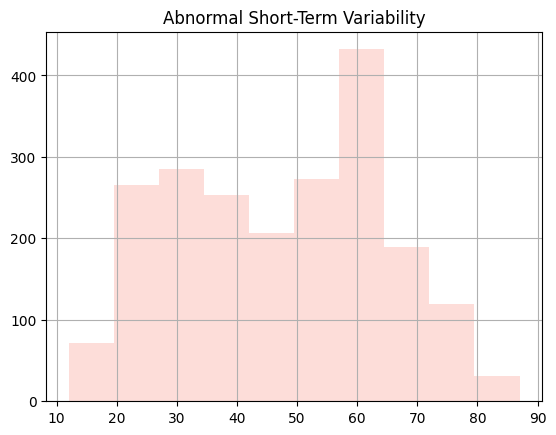

In [11]:
df.abnormal_short_term_variability.hist()
plt.title('Abnormal Short-Term Variability');

In [12]:
df.corr()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline_value,1.000,-0.081,-0.033,-0.146,-0.159,-0.054,-0.105,0.306,-0.280,0.286,...,0.362,0.275,-0.114,-0.005,0.709,0.723,0.789,-0.134,0.294,0.148
accelerations,-0.081,1.000,0.048,0.090,-0.109,-0.043,-0.128,-0.280,0.207,-0.374,...,-0.154,0.394,0.190,-0.006,0.244,0.270,0.273,0.126,0.028,-0.364
fetal_movement,-0.033,0.048,1.000,-0.069,0.049,-0.011,0.266,-0.104,0.121,-0.074,...,-0.154,0.100,0.165,-0.018,-0.061,-0.090,-0.072,0.179,-0.002,0.088
uterine_contractions,-0.146,0.090,-0.069,1.000,0.285,0.007,0.077,-0.233,0.290,-0.307,...,-0.113,0.123,0.083,0.058,-0.105,-0.188,-0.140,0.239,-0.072,-0.205
light_decelerations,-0.159,-0.109,0.049,0.285,1.000,0.108,0.226,-0.119,0.562,-0.271,...,-0.554,0.218,0.398,0.235,-0.347,-0.527,-0.389,0.564,0.000,0.059
severe_decelerations,-0.054,-0.043,-0.011,0.007,0.108,1.000,0.012,0.034,0.034,-0.031,...,-0.072,-0.021,0.007,0.043,-0.215,-0.159,-0.160,0.136,-0.070,0.132
prolonged_decelerations,-0.105,-0.128,0.266,0.077,0.226,0.012,1.000,0.046,0.267,-0.137,...,-0.277,0.120,0.223,0.056,-0.436,-0.489,-0.445,0.503,-0.215,0.485
abnormal_short_term_variability,0.306,-0.280,-0.104,-0.233,-0.119,0.034,0.046,1.000,-0.431,0.459,...,0.275,-0.112,-0.168,-0.149,0.058,0.075,0.120,-0.146,-0.006,0.471
mean_value_of_short_term_variability,-0.280,0.207,0.121,0.290,0.562,0.034,0.267,-0.431,1.000,-0.470,...,-0.623,0.409,0.501,0.266,-0.308,-0.445,-0.336,0.556,-0.066,-0.103
percentage_of_time_with_abnormal_long_term_variability,0.286,-0.374,-0.074,-0.307,-0.271,-0.031,-0.137,0.459,-0.470,1.000,...,0.423,-0.283,-0.279,-0.122,0.165,0.222,0.186,-0.282,0.042,0.426


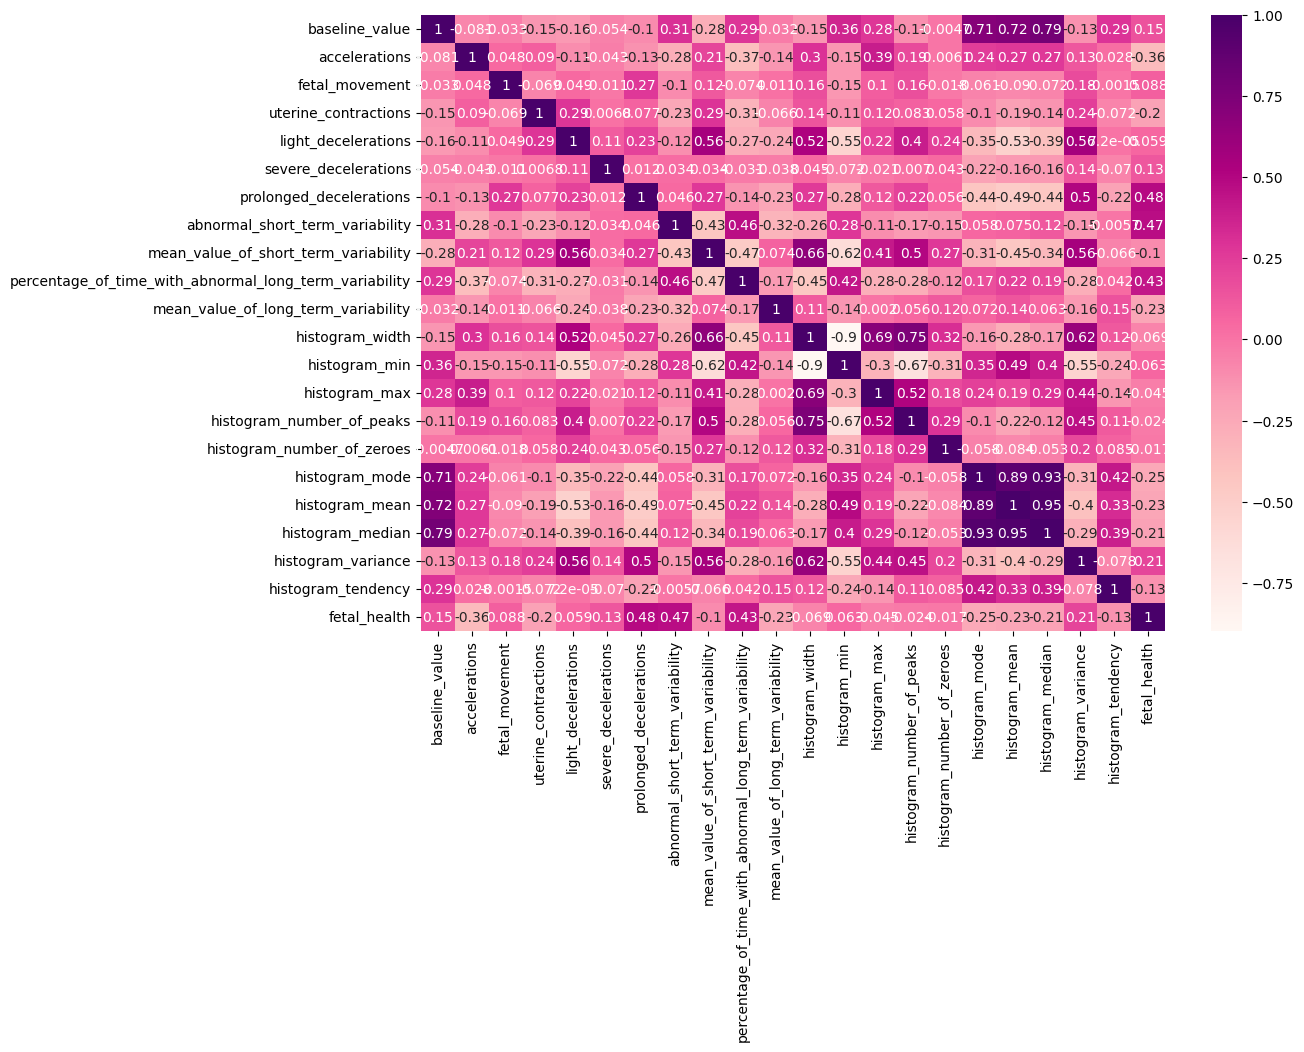

In [13]:
# generate heatmap to display correlations in data
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="RdPu");

/var/folders/m8/yptcsd712qlglr3_zr4msz340000gn/T/ipykernel_33091/2957673926.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['baseline_value'])


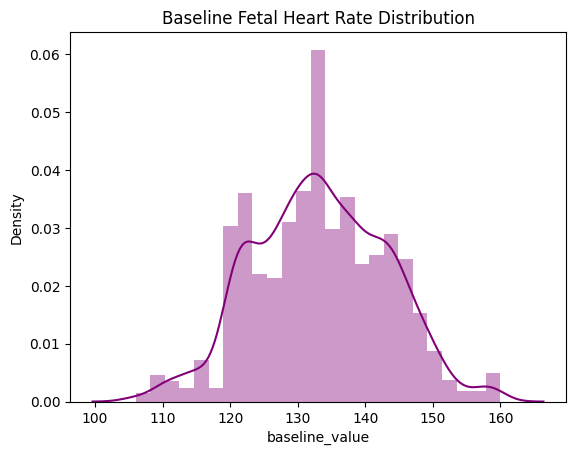

In [15]:
sns.set_palette(palette='RdPu_r')
sns.distplot(df['baseline_value'])
plt.title('Baseline Fetal Heart Rate Distribution');

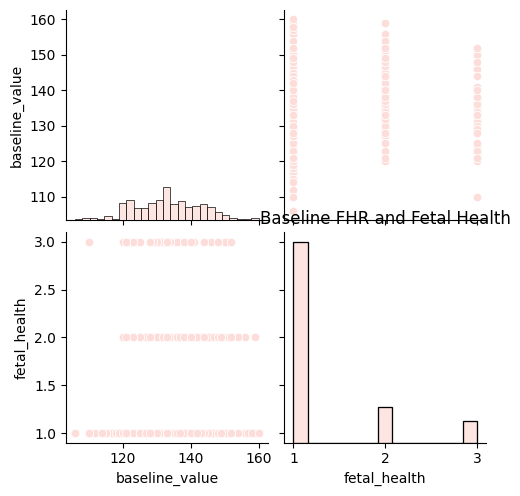

In [16]:
sns.set_palette(palette='RdPu')
sns.pairplot(df[['baseline_value', 'fetal_health']])
plt.title('Baseline FHR and Fetal Health');

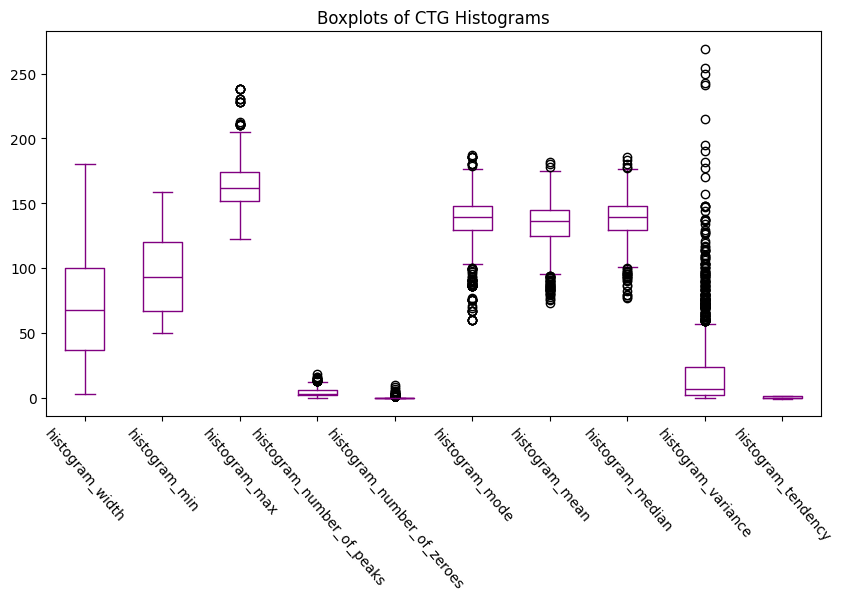

In [17]:
histogram_columns = ['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
df[histogram_columns].plot(kind='box',grid=False, color='Purple', figsize=(10,5));
plt.xticks(rotation=(-50))
plt.title('Boxplots of CTG Histograms');

## Data

In [18]:
# checking for null values
df.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolonged_decelerations                                   0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [19]:
# checking value counts for target variable
df.fetal_health.value_counts()

fetal_health
1.000    1655
2.000     295
3.000     176
Name: count, dtype: int64

In [20]:
# engineering new categorical target column for Normal and At Risk fetal health
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'

In [21]:
df = df.drop(columns='fetal_health', axis=1)
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,At Risk
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,Normal
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,Normal
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,Normal
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,Normal


In [22]:
df.fh_outcome.value_counts()

fh_outcome
Normal     1655
At Risk     471
Name: count, dtype: int64

In [23]:
df = pd.get_dummies(df, columns=['fh_outcome'])
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk,fh_outcome_Normal
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,True,False
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,False,True
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,False,True
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,False,True
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,False,True


In [24]:
df = df.drop(columns=['fh_outcome_Normal'], axis=1)
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,True
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,False
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,False
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,False
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,False


In [25]:
df = df.rename(columns={'fh_outcome_At Risk':'target'})
df.target.value_counts()

target
False    1655
True      471
Name: count, dtype: int64

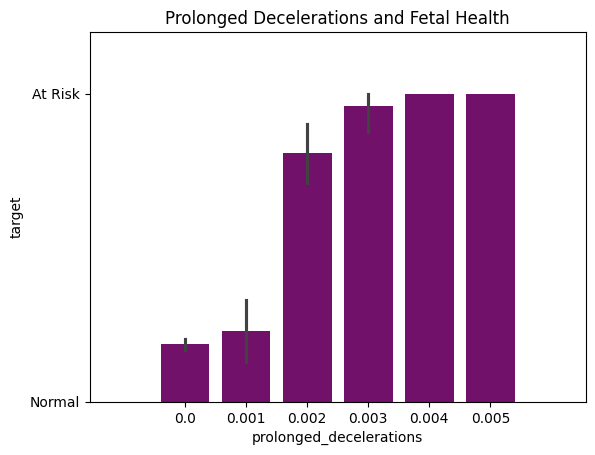

In [28]:
sns.set_palette(palette='RdPu_r')
sns.barplot(data=df, x='prolonged_decelerations',y='target')
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

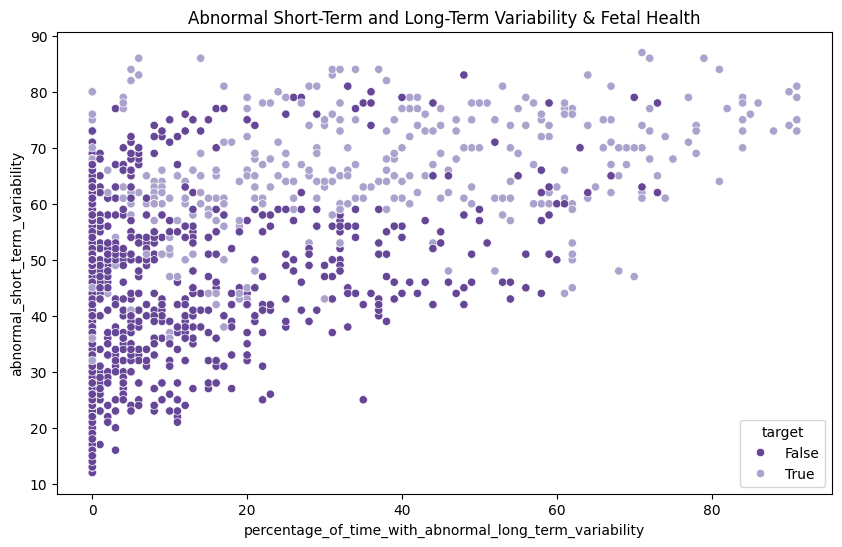

In [29]:
# create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="percentage_of_time_with_abnormal_long_term_variability", y="abnormal_short_term_variability", hue='target', data=df)
plt.title('Abnormal Short-Term and Long-Term Variability & Fetal Health');

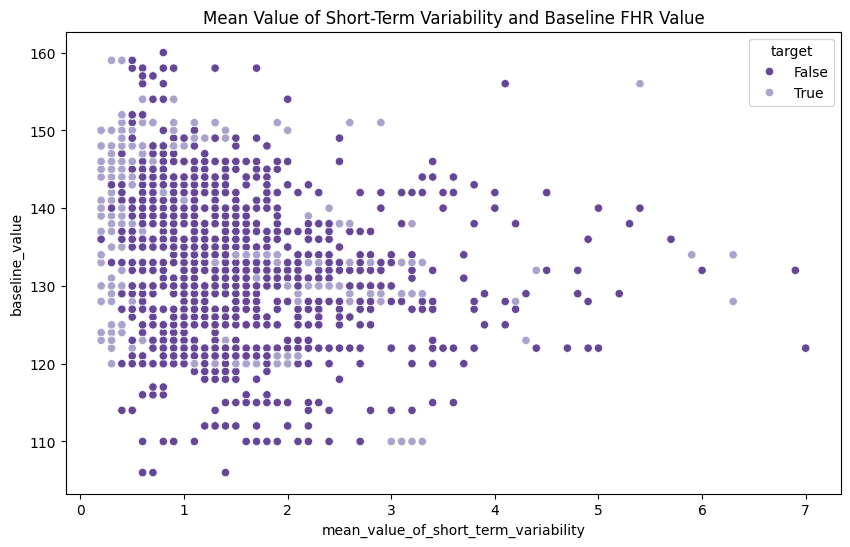

In [30]:
# create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="baseline_value", hue='target', data=df)
plt.title('Mean Value of Short-Term Variability and Baseline FHR Value');

## Model and training

In [31]:
# setting target and features
y = df['target']
X = df.drop(columns='target')

# splitting the data into train and test sets
# using stratify parameter to make sure class ratios 
# are distributed evenly across train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### Model 1: Unbalanced

In [42]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) 
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[484  13]
 [ 32 109]]
              precision    recall  f1-score   support

       False       0.94      0.97      0.96       497
        True       0.89      0.77      0.83       141

    accuracy                           0.93       638
   macro avg       0.92      0.87      0.89       638
weighted avg       0.93      0.93      0.93       638

Recall score:  0.7730496453900709


<Axes: >

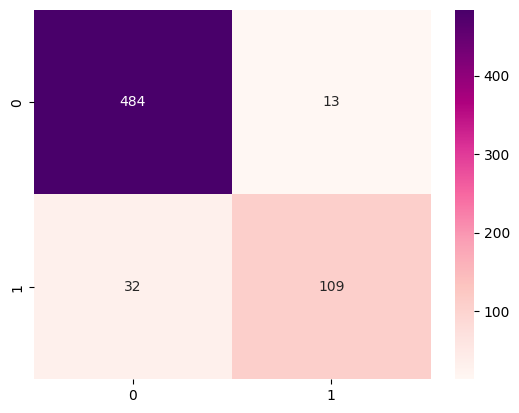

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdPu', fmt='g')

### Model 2: Balanced

In [44]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42) 
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[463  34]
 [ 23 118]]
              precision    recall  f1-score   support

       False       0.95      0.93      0.94       497
        True       0.78      0.84      0.81       141

    accuracy                           0.91       638
   macro avg       0.86      0.88      0.87       638
weighted avg       0.91      0.91      0.91       638

Recall score:  0.8368794326241135


<Axes: >

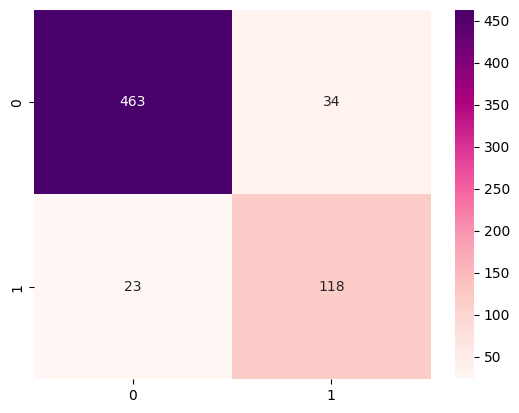

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdPu', fmt='g')

### Model 3: Random Forest

In [46]:
# function to make a pipeline with classifier input
def pipe_maker(classifier):
    '''Takes in a classifier, returns a pipeline'''
    pipe = Pipeline([('scl', StandardScaler()),
                    ('clf', classifier(class_weight= 'balanced', random_state=42))])
    return pipe

In [51]:
# setting generic grid search parameters
param_range = [1, 2, 4, 8, 10]
param_range_small = [1.0, 0.5, 0.1]

In [48]:
# function to create a grid search containing pipeline
def gridsearch_maker(pipeline, params):
    '''Takes in a pipeline and param grid, returns GridSearchCV object'''
    return GridSearchCV(estimator=pipeline,
                        param_grid=params,
                        scoring='recall',
                        cv=10,
                        n_jobs=-1)

In [49]:
def find_best_recall(gridsearch):
    # fitting the grid search objects
    best_recall = 0.0
    # fitting grid search
    gridsearch.fit(X_train, y_train)
    # best params
    print('Best params: %s' % gridsearch.best_params_)
    # best training data recall
    print('Best training recall: %.3f' % gridsearch.best_score_)
    # predict on test data with best params
    y_pred = gridsearch.predict(X_test)
    # test data recall with best params
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    # confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Recall score: ',recall_score(y_test, y_pred))
    # plotting confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdPu', fmt='g')
    plt.show()

Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 8, 'clf__min_samples_split': 2}
Best training recall: 0.921
Test set recall score for best params: 0.936 
[[461  36]
 [  9 132]]
              precision    recall  f1-score   support

       False       0.98      0.93      0.95       497
        True       0.79      0.94      0.85       141

    accuracy                           0.93       638
   macro avg       0.88      0.93      0.90       638
weighted avg       0.94      0.93      0.93       638

Recall score:  0.9361702127659575


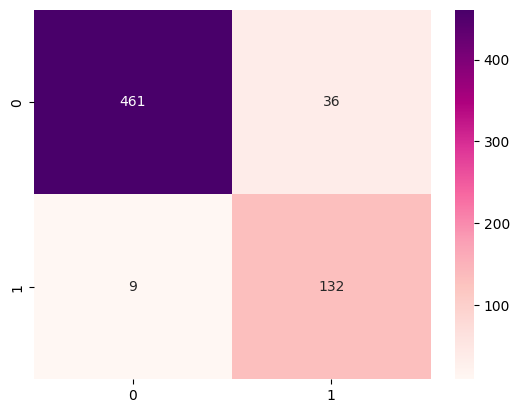

In [52]:
# fitting Random Forest pipeline
pipe_rf = pipe_maker(RandomForestClassifier)

# setting grid search parameters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# finding best parameters for recall
find_best_recall(gs_rf)

### Model 4: Support Vector Machine

Best params: {'clf__C': 1, 'clf__kernel': 'rbf'}
Best training recall: 0.955
Test set recall score for best params: 0.943 
[[438  59]
 [  8 133]]
              precision    recall  f1-score   support

       False       0.98      0.88      0.93       497
        True       0.69      0.94      0.80       141

    accuracy                           0.89       638
   macro avg       0.84      0.91      0.86       638
weighted avg       0.92      0.89      0.90       638

Recall score:  0.9432624113475178


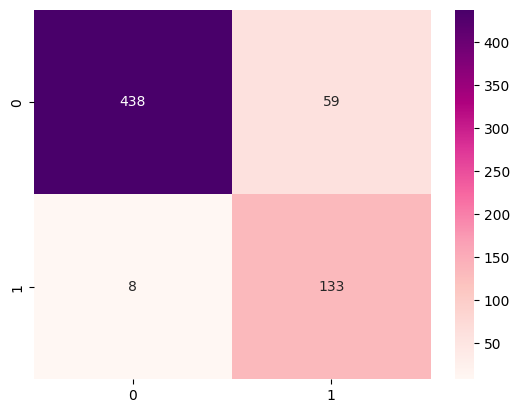

In [53]:
# fitting Support Vector Machine pipeline
pipe_svm = pipe_maker(svm.SVC)

# setting grid search parameters
grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                    'clf__C': param_range}]

# creating grid search object
gs_svm = gridsearch_maker(pipe_svm, grid_params_svm)

# finding best parameters for recall
find_best_recall(gs_svm)